In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('la_rest_types.csv', index_col=False)

In [18]:
# df.sample()
df.head(2)


,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
0,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Middle Eastern,4.0,349,34.159455,-118.267173,91202
1,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Barbeque,4.0,349,34.159455,-118.267173,91202


In [19]:
df.zipcodes.str.startswith('9')

0        True
1        True
2        True
3        True
4        True
         ... 
61420    True
61421    True
61422    True
61423    True
61424    True
Name: zipcodes, Length: 61425, dtype: bool

In [20]:
df=df[df.zipcodes.str.startswith('9')]

In [21]:
# df.isnull()

In [22]:
df['category_title'].replace(' ', np.nan, inplace=True)

In [23]:
# df.isnull()

In [24]:
df.dropna(inplace=True)

In [25]:
df.reset_index(drop=True)
df.sample(2)

,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
37357,nsMT0ocKAnqjelB5UZw5Tw,Black Angus Steakhouse,"5000 E Candlewood St Lakewood, CA 90712",Sports Bars,3.0,562,33.853536,-118.134606,90712
25764,HuT15bPwGszwwcmHxVxDwA,Birria El Tapatio,"216 S Euclid St Anaheim, CA 92802",Food Trucks,4.5,34,33.831124,-117.940690,92802


In [26]:
# df.isnull()

In [27]:
df['rating'].value_counts()

4.0    13291
4.5     7968
3.5     7900
3.0     4029
5.0     2504
2.5     2346
2.0     2010
1.5      832
1.0      268
Name: rating, dtype: int64

In [28]:
# df['category_title'].value_counts(normalize=True)
rating=list(df['rating'].value_counts(bins=3))

In [76]:
rating

[23763, 14275, 3110]

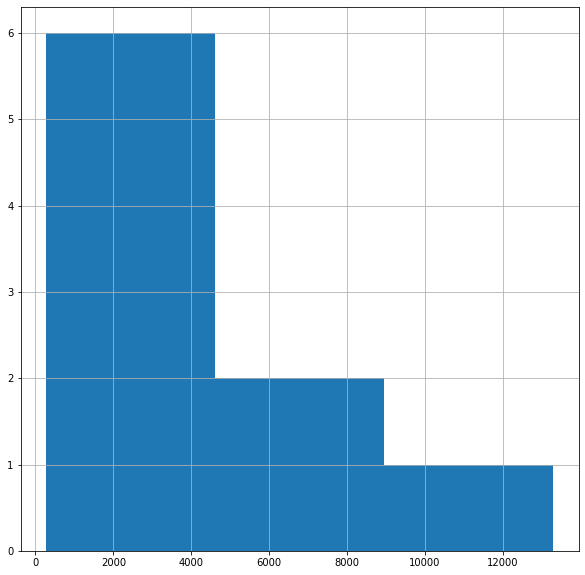

In [81]:
df['rating'].value_counts().hist(bins=3, figsize=(10,10))

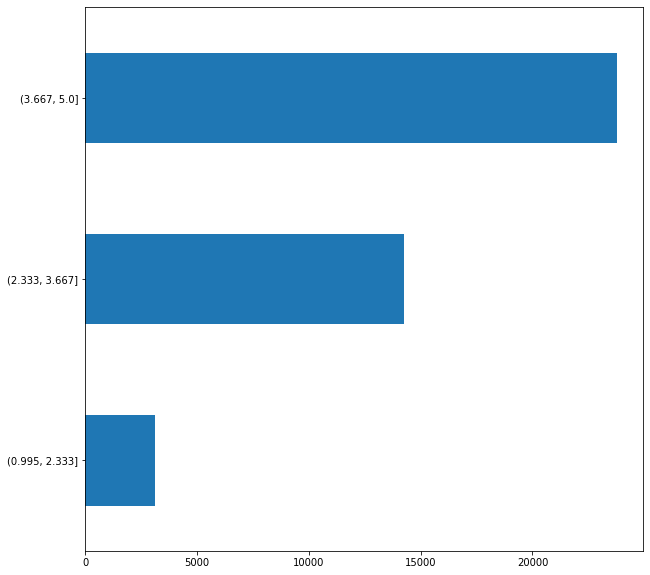

In [83]:
df.rating.value_counts(bins=3).sort_values().plot(kind = 'barh', figsize=(10,10))

In [103]:
data = df['review_count'].value_counts()



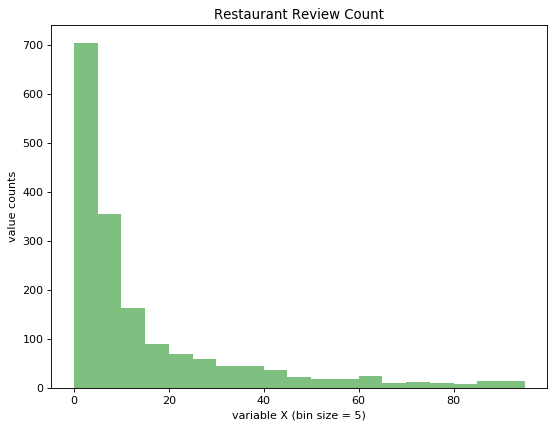

In [118]:
data = df['review_count'].value_counts()

# fixed bin size
bins = np.arange(0, 100, 5)
rgb_cycle = np.vstack((            # Three sinusoids
    .5*(1.+np.cos(phi          )), # scaled to [0,1]
    .5*(1.+np.cos(phi+2*np.pi/3)), # 120° phase shifted.
    .5*(1.+np.cos(phi-2*np.pi/3)))).T # Shape = (60,3)

# plt.xlim([min(data)-5, max(data)+5])

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.hist(data, bins=bins, alpha=0.5, color='g', )
plt.title('Restaurant Review Count')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('value counts')

plt.show()

In [119]:
cat_desc=df['category_title'].describe()

#cat_desc.value_counts()

In [120]:
 %matplotlib inline

In [121]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [122]:
desc=df.describe()
desc

,rating,review_count,lat,lon
count,41148.000000,41148.000000,41148.000000,41148.000000
mean,3.710460,320.939122,33.979838,-118.256826
std,0.824635,541.021245,0.122265,0.173395
min,1.000000,1.000000,33.167953,-122.636364
25%,3.500000,40.000000,33.884035,-118.367151
50%,4.000000,141.000000,34.009925,-118.267295
75%,4.500000,384.000000,34.063720,-118.144367
max,5.000000,16955.000000,37.895588,-117.225868


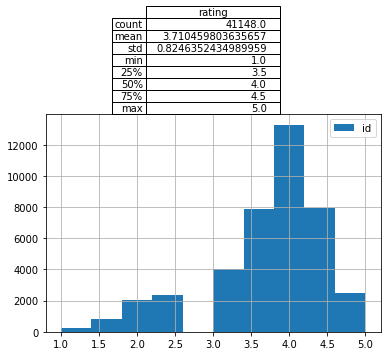

In [123]:
fig, axes = plt.subplots(1,1)
axes = df['rating'].hist()

plt.legend(df.columns)
dfsummary = pd.DataFrame(df['rating'].describe())
plt.figsize=(12,12)
plt.table(cellText=dfsummary.values,
      colWidths = [0.4]*2,
      rowLabels=dfsummary.index,
      colLabels=dfsummary.columns,
      cellLoc = 'right', rowLoc = 'right',
      loc='top')

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x101cfa5dd0>,
      dtype=object)

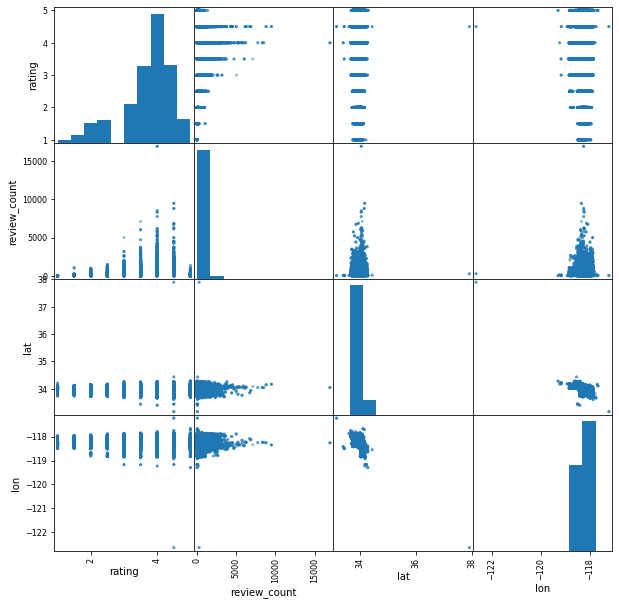

In [124]:
scatter_matrix(df, figsize=(10,10))

In [125]:
desc.groupby('rating')['review_count'].mean()

rating
0.824635          541.021245
1.000000            1.000000
3.500000           40.000000
3.710460          320.939122
4.000000          141.000000
4.500000          384.000000
5.000000        16955.000000
41148.000000    41148.000000
Name: review_count, dtype: float64

In [126]:
desc.groupby('rating')['review_count'].mean()

rating
0.824635          541.021245
1.000000            1.000000
3.500000           40.000000
3.710460          320.939122
4.000000          141.000000
4.500000          384.000000
5.000000        16955.000000
41148.000000    41148.000000
Name: review_count, dtype: float64

In [127]:
# df[df['rating']> 2.5].groupby('address')['rating']

zipcodes        90000.0
review_count        1.0
rating              1.0
dtype: float64

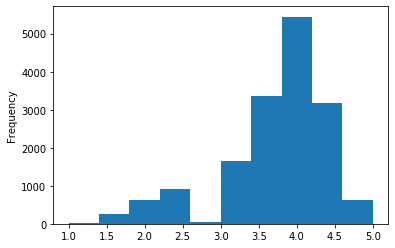

In [128]:
gr_zip = df.groupby(['zipcodes', 'review_count'])['rating'].median().reset_index()

gr_zip['rating'].plot(kind='hist')
gr_zip.min()


In [129]:
df.groupby('category_title').rating.apply(lambda x: len(x[x>2.5])/len(x) )

category_title
 Acai Bowls                0.975610
 African                   1.000000
 American (New)            0.964509
 American (Traditional)    0.860645
 Amusement Parks           0.500000
                             ...   
Waffles                    1.000000
Wine Bars                  1.000000
Wine Tasting Room          1.000000
Wineries                   1.000000
Wraps                      0.500000
Name: rating, Length: 499, dtype: float64

In [130]:
df.sample()

,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
964,-1b56P0G_AoR3O2o6DaPJg,La Corona Meat Market & Deli,"6353 Miles Ave Huntington Park, CA 90255",Butcher,5.0,1,33.98205,-118.21946,90255


In [131]:
means = df.groupby('zipcodes').mean()['rating']
means
# medians = clean_study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
# variances = clean_study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
# sds = clean_study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
# sems = clean_study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# summary_table = pd.DataFrame({"Mean Tumor Volume":means,
#                               "Median Tumor Volume":medians,
#                               "Tumor Volume Variance":variances,
#                               "Tumor Volume Std. Dev.":sds,
#                               "Tumor Volume Std. Err.":sems})

zipcodes
90000    4.000000
90001    3.626582
90002    3.352273
90003    3.304965
90004    3.852941
           ...   
94703    5.000000
94970    4.500000
95020    3.000000
95113    3.000000
96001    5.000000
Name: rating, Length: 346, dtype: float64

In [132]:
medians = df.groupby('zipcodes').median()['rating']
medians

zipcodes
90000    4.0
90001    4.0
90002    4.0
90003    3.5
90004    4.0
        ... 
94703    5.0
94970    4.5
95020    3.0
95113    3.0
96001    5.0
Name: rating, Length: 346, dtype: float64

In [133]:
revCount = df.groupby('zipcodes').sum()['review_count']
revCount


zipcodes
90000     1753
90001     6070
90002     1904
90003     5562
90004    72633
         ...  
94703        1
94970      520
95020       36
95113     2766
96001       18
Name: review_count, Length: 346, dtype: int64

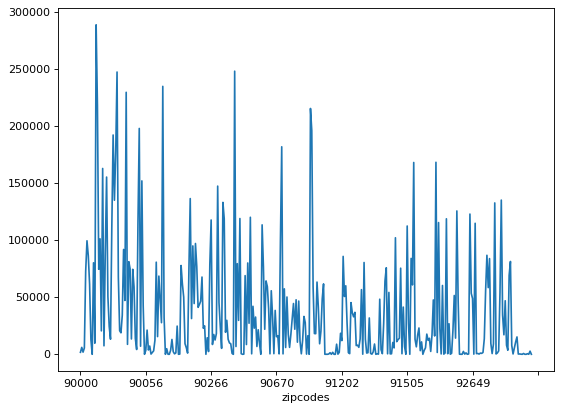

In [134]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
revCount.plot(kind='line')

In [135]:
# install seaborn
# %%bash
# pip install seaborn

In [136]:
means = df.groupby('zipcodes').mean()['rating']
means

zipcodes
90000    4.000000
90001    3.626582
90002    3.352273
90003    3.304965
90004    3.852941
           ...   
94703    5.000000
94970    4.500000
95020    3.000000
95113    3.000000
96001    5.000000
Name: rating, Length: 346, dtype: float64

In [137]:
total_count = df.groupby('zipcodes').size()
total_count

zipcodes
90000      5
90001    237
90002     44
90003    141
90004    323
        ... 
94703      1
94970      2
95020      1
95113      3
96001      3
Length: 346, dtype: int64

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
 

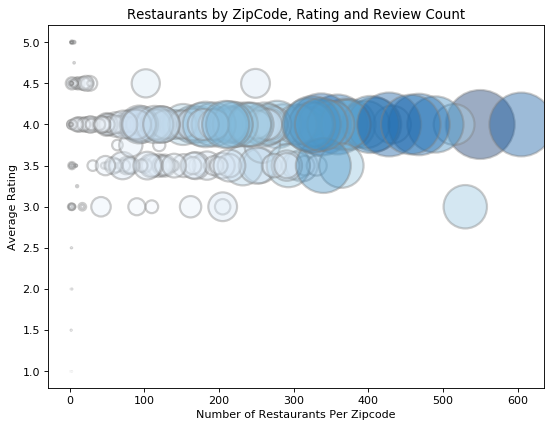

In [139]:
# create data
x = total_count
y = medians
z = revCount
# z=z*z
# z=z.sum()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z/75, c=z, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)

plt.xlabel("Number of Restaurants Per Zipcode")
plt.ylabel("Average Rating")
plt.title("Restaurants by ZipCode, Rating and Review Count")
 
plt.show()

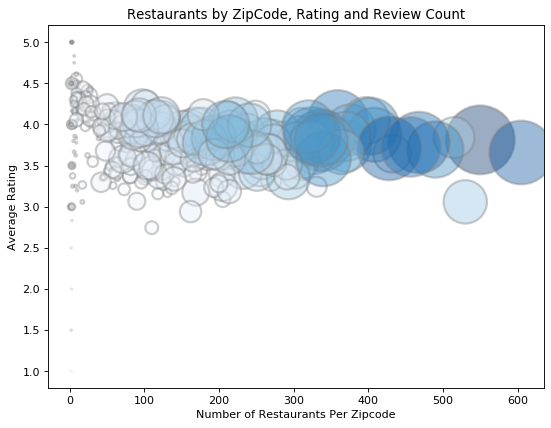

In [140]:
# create data
x = total_count
y = means
z = revCount
# z=z*z
# z=z.sum()
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z/75, c=z, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)

# Add titles (main and on axis)
plt.xlabel("Number of Restaurants Per Zipcode")
plt.ylabel("Average Rating")
plt.title("Restaurants by ZipCode, Rating and Review Count")
 
plt.show()

In [141]:
g = df.groupby('zipcodes')
rest_zips = [name for name,unused_df in g]
# rest_zips

In [142]:
# rest_zip = df['zipcodes'].unique()
# rest_zip

In [143]:
summary_table = pd.DataFrame({"Avg":means,
                              "Med":medians,
                              "RevCnt":revCount,
                              "ZipCnt":total_count,
                              "Zips":rest_zips})
summary_table

,Avg,Med,RevCnt,ZipCnt,Zips
zipcodes,,,,,
90000,4.000000,4.0,1753,5,90000
90001,3.626582,4.0,6070,237,90001
90002,3.352273,4.0,1904,44,90002
90003,3.304965,3.5,5562,141,90003
90004,3.852941,4.0,72633,323,90004
...,...,...,...,...,...
94703,5.000000,5.0,1,1,94703
94970,4.500000,4.5,520,2,94970
95020,3.000000,3.0,36,1,95020


In [144]:
summary_table["ZipCnt"]>=500


zipcodes
90000    False
90001    False
90002    False
90003    False
90004    False
         ...  
94703    False
94970    False
95020    False
95113    False
96001    False
Name: ZipCnt, Length: 346, dtype: bool

In [150]:
summary_table[summary_table["ZipCnt"]>=500]

,Avg,Med,RevCnt,ZipCnt,Zips
zipcodes,,,,,
90012,3.812727,4.0,288699,550,90012
90015,3.841748,4.0,101195,515,90015
90028,3.659504,4.0,247340,605,90028
90045,3.059434,3.0,114351,530,90045


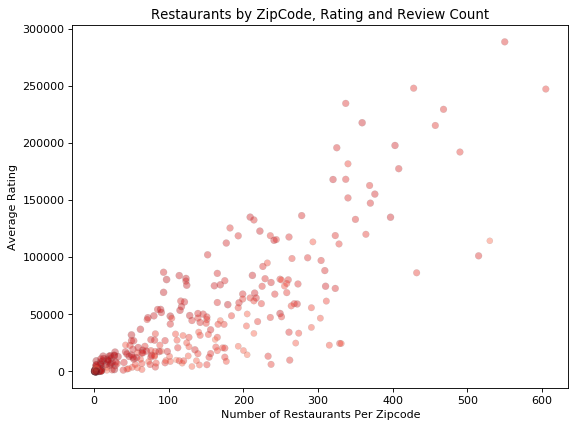

In [151]:
# create data
x = total_count
y = revCount
z = means
# z=z*z
# z=z.sum()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z*10, c=z, cmap="Reds", alpha=0.4, edgecolors="grey", linewidth=.25)
 
# Add titles (main and on axis)
plt.xlabel("Number of Restaurants Per Zipcode")
plt.ylabel("Average Rating")
plt.title("Restaurants by ZipCode, Rating and Review Count")
 
plt.show()

In [152]:
api_key = 'Your key here'
'

In [153]:
import gmaps


# Access maps with unique API key
gmaps.configure(api_key=api_key)

In [154]:
#datframe for all types of food
aT=pd.read_csv('LA_rest_yelp_no_dupes.csv')
aT.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon
2988,8ID5FRgb5BvYrQKQHyTyog,Church's Chicken,1.323758e+10,"11251 S Western Ave Los Angeles, CA 90047","hotdogs, chicken_wings,","Fast Food, Chicken Wings,",2.0,13,33.93126,-118.3094


In [155]:
zipcodes = list()

for item in aT['address']:
    zipcode = item.split()[-1]
    zipcodes.append(zipcode)

aT['zipcodes'] = zipcodes
aT = pd.DataFrame(aT)
aT.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
19316,Z1-Sy48hV5F01IQqbZZgjg,Natas Pastries,1.818789e+10,"13317 Ventura Blvd Ste D Sherman Oaks, CA 91423","portuguese, cafes, desserts,","Portuguese, Cafes, Desserts,",4.0,851,34.146779,-118.422992,91423


In [156]:
list(aT[aT["zipcodes"]=='Kingdom']['address'])

['Suite 131  735 S Figueroa Street  Los Angeles 90017  United Kingdom',
 '243 Castle La West  Bournemouth BH8 9TG  United Kingdom',
 '181 Thornley La South  Stockport SK5 6QG  United Kingdom']

In [157]:
#verify that only Los Angeles locatins
# list(aT[aT["zipcodes"]=='CA']['address'])

In [158]:
aT=aT[aT.zipcodes.str.startswith('9')]
aT.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
10426,l-4Gnofw4Tqy-aXQvQvBVQ,Carl's Jr,1.562943e+10,"9400 Slauson Ave Pico Rivera, CA 90660","hotdogs, burgers,","Fast Food, Burgers,",2.0,33,33.968226,-118.09701,90660


In [159]:
#get restaurants with more than 100 reviews
aT=aT[aT["review_count"]>=100]

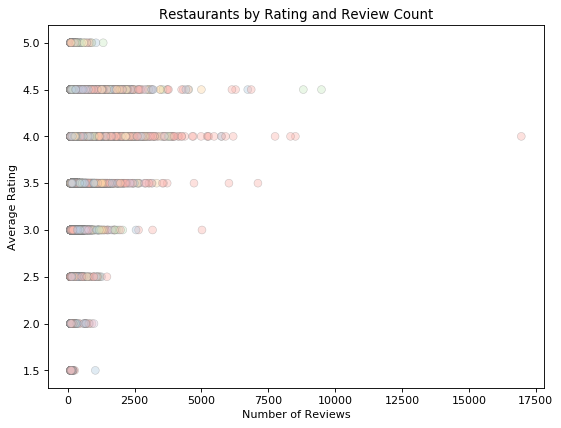

In [160]:
x = aT["review_count"]
y = aT["rating"]
z = aT.zipcodes.astype(int)
# z=z*z
# z=z.sum()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=50, c=z, cmap="Pastel1", alpha=0.4, edgecolors="grey", linewidth=.5)
 
# Add titles (main and on axis)
plt.xlabel("Number of Reviews")
plt.ylabel("Average Rating")
plt.title("Restaurants by Rating and Review Count")
 
plt.show()

In [161]:
aT[aT["review_count"]>=15000]

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
15773,TkFEKhsCixPWlShULKvMdQ,Bottega Louie,1.213802e+10,"700 S Grand Ave Los Angeles, CA 90017","italian, bakeries, breakfast_brunch,","Italian, Bakeries, Breakfast & Brunch,",4.0,16955,34.04693,-118.256601,90017


In [162]:
aT[aT["zipcodes"]=='90017'].mean()

phone           1.217504e+10
rating          3.698795e+00
review_count    7.163614e+02
lat             3.404958e+01
lon            -1.182615e+02
zipcodes                 inf
dtype: float64

In [163]:
aT.describe()

,phone,rating,review_count,lat,lon
count,1.064200e+04,10741.000000,10741.000000,10741.000000,10741.000000
mean,1.483958e+10,3.821758,503.393259,33.981854,-118.253166
std,2.036202e+09,0.579965,598.806651,0.133527,0.193931
min,1.201844e+10,1.500000,100.000000,33.662399,-122.636364
25%,1.310560e+10,3.500000,179.000000,33.870215,-118.383880
50%,1.424278e+10,4.000000,316.000000,34.017345,-118.280314
75%,1.626965e+10,4.000000,597.000000,34.076020,-118.113167
max,1.951456e+10,5.000000,16955.000000,37.895588,-117.750724


In [164]:
badR=aT[(aT["review_count"]>=500) & (aT["rating"]== 1.5)]
badR

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
8855,ILuXurLzw4N30I_RbPON2A,Buffalo Wild Wings,1.310437e+10,"736 East Del Amo Blvd Carson, CA 90746","chicken_wings, sportsbars, tradamerican,","Chicken Wings, Sports Bars, American (Traditio...",1.5,1032,33.847007,-118.262301,90746


In [166]:

lat=list(badR['lat'])
lon=list(badR['lon'])

zip(lat, lon)

coordinates = [x for x in zip(lat, lon)]


# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
# Assign the marker layer to a variable
markers = gmaps.marker_layer(coordinates)
# heat_layer = gmaps.heatmap_layer(coordinates, weights=badR['rating']-1.5, 
#                                  dissipating=False, max_intensity=1.5,
#                                  point_radius = .000008)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [167]:
bestR=aT[(aT["review_count"]>=500) & (aT["rating"]== 5)]
bestR

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
1058,26qU1-u0hSYOjYDaqIcGPw,Yo-Way Eatery,1.424228e+10,"17901 S Vermont Ste D Gardena, CA 90248","juicebars, icecream, sandwiches,","Juice Bars & Smoothies, Ice Cream & Frozen Yog...",5.0,804,33.867865,-118.291121,90248
2247,6065vasIMEdNG72QYgxkKw,Churros Don Abel,1.562613e+10,"5468 Whittier Blvd East Los Angeles, CA 90022","mexican, streetvendors,","Mexican, Street Vendors,",5.0,637,34.019058,-118.151954,90022
3911,aRXhjkQ71aFkUla1nfrkUQ,New York Chicken & Gyro,1.818806e+10,"7553 Topanga Canyon Blvd Canoga Park, CA 91303","mediterranean, halal,","Mediterranean, Halal,",5.0,1326,34.207980,-118.606290,91303
4310,beA_DlDpij8O9xK2B-NjEA,Mex Perú Gipsy,1.213748e+10,"414 E 12th St Los Angeles, CA 90015","mexican, peruvian, seafood,","Mexican, Peruvian, Seafood,",5.0,876,34.035217,-118.255910,90015
4900,CcqraT0cuGKYEcZ1ri_kxg,BROKEN MOUTH | Lee's Homestyle,1.213419e+10,"231 E 9th St Los Angeles, CA 90015","asianfusion, hawaiian, korean,","Asian Fusion, Hawaiian, Korean,",5.0,818,34.040403,-118.253512,90015
7600,GkPQeI-C3ZNB3Kgvp0fUMQ,Sandwich House,1.714829e+10,"9187 Valley View St Cypress, CA 90630","sandwiches, vietnamese,","Sandwiches, Vietnamese,",5.0,1057,33.828714,-118.029101,90630
7973,h5pIO8EF-FAMHMQhMnpiXg,Tribute Coffee,1.714852e+10,"13960 Harbor Blvd Garden Grove, CA 92843","coffee, cafes,","Coffee & Tea, Cafes,",5.0,594,33.760412,-117.919869,92843
8570,I2Y6ajDqATnACo6L9pRbbQ,Mi Ranchito Veracruz,1.818288e+10,"13363 Saticoy St Ste 102 North Hollywood, CA...","mexican, breakfast_brunch,","Mexican, Breakfast & Brunch,",5.0,704,34.209078,-118.424459,91605
9391,JgjWjllG1MVR30ROuFlLyA,NoHo Cafe,1.818510e+10,"5964 Laurel Canyon Blvd North Hollywood, CA 9...","mediterranean, mideastern, persian,","Mediterranean, Middle Eastern, Persian/Iranian,",5.0,904,34.179260,-118.396186,91607
11899,nDrU4Jdz2C5yj23ps4BVug,Pisces Poke & Ramen,1.323613e+10,"5587 Huntington Dr N Los Angeles, CA 90032","poke, sushi, ramen,","Poke, Sushi Bars, Ramen,",5.0,718,34.095496,-118.158601,90032


In [168]:
bestR=aT[(aT["review_count"]>=500) & (aT["rating"]== 5)]

lat=list(bestR['lat'])
lon=list(bestR['lon'])

zip(lat, lon)
coordinates = [x for x in zip(lat, lon)]



# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
rest_name=bestR['name'].tolist()
# Assign the marker layer to a variable
info_box_content=[f"Restaurant name: {name}" for name in rest_name]
markers = gmaps.marker_layer(coordinates, info_box_content=info_box_content )
heat_layer = gmaps.heatmap_layer(coordinates, weights=bestR['rating']-5, 
                                 dissipating=False, max_intensity=5,
                                 point_radius = .018)
# Add the layer to the map
fig.add_layer(heat_layer)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [169]:
mapdf=aT[(aT["zipcodes"]=='90017') & (aT["rating"]>= 3.5)]

lat=list(mapdf['lat'])
lon=list(mapdf['lon'])

zip(lat, lon)
coordinates = [x for x in zip(lat, lon)]

# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
# Assign the marker layer to a variable
# markers = gmaps.marker_layer(coordinates)
heat_layer = gmaps.heatmap_layer(coordinates, weights=mapdf['rating']-3.5, 
                                 dissipating=False, max_intensity=1.5,
                                 point_radius = .0008)
# Add the layer to the map
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [170]:
mapdf=aT[(aT["zipcodes"]=='90017') & (aT["rating"]>= 3.5)]
mapdf.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
3648,AEaRYgpydv7i0g4XizwwHg,Morton's The Steakhouse,1.213553e+10,"735 S Figueroa St Ste 207 Los Angeles, CA 90017","steak, seafood, bars,","Steakhouses, Seafood, Bars,",3.5,734,34.049364,-118.260947,90017
